QUESTION 1:
What is Anomaly Detection? Explain its types.

ANSWER:
Anomaly Detection is the process of identifying unusual patterns that deviate from expected behavior.

Point anomaly: A single data point significantly deviates from others. Example: A sudden $10,000 taxi fare.
Contextual anomaly: A data point is abnormal in a specific context. Example: High electricity usage at midnight.
Collective anomaly: A group of data points is abnormal together. Example: Continuous drop in passenger count over several months.


QUESTION 2:
Compare Isolation Forest, DBSCAN, and Local Outlier Factor.

ANSWER:
Isolation Forest isolates anomalies using random partitioning and works well for high-dimensional data.
DBSCAN detects anomalies as noise points based on density.
LOF compares local density of a point to its neighbors to detect anomalies.
Isolation Forest is good for large datasets, DBSCAN for spatial clusters, LOF for local density variation.


QUESTION 3:
What are key components of a Time Series?

ANSWER:
Trend: Long-term movement. Example: Increasing airline passengers over years.
Seasonality: Repeating patterns. Example: Higher sales during holidays.
Cyclic: Irregular long-term fluctuations. Example: Economic cycles.
Residual: Random noise remaining after removing trend and seasonality.


QUESTION 4:
Define Stationary and how to test/transform.

ANSWER:
A stationary series has constant mean, variance, and autocorrelation over time.
Test using Augmented Dickey-Fuller test.
Transform using differencing, log transformation, or seasonal differencing.


QUESTION 5:
Differentiate AR, MA, ARIMA, SARIMA, SARIMAX.

ANSWER:
AR uses past values.
MA uses past errors.
ARIMA combines AR and MA with differencing.
SARIMA adds seasonal components.
SARIMAX includes external exogenous variables.


QUESTION 6:
Load AirPassengers dataset, plot and decompose.

ANSWER:


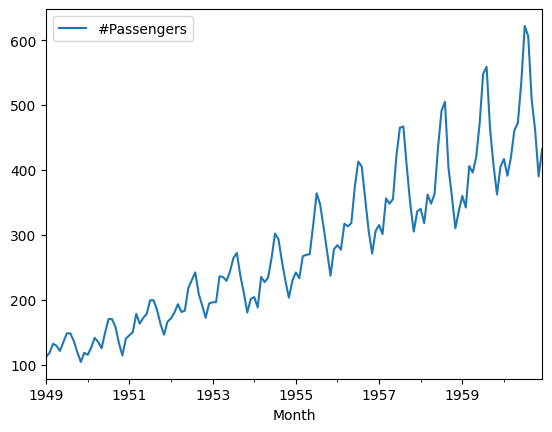

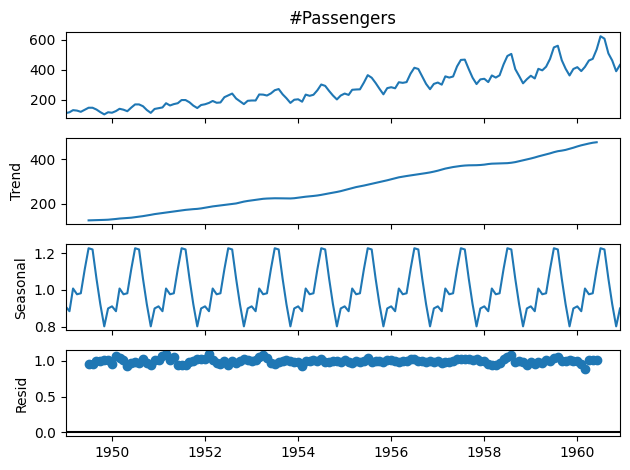

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

data = pd.read_csv("/content/AirPassengers.csv", parse_dates=["Month"], index_col="Month")
data.plot()
plt.show()

decomp = seasonal_decompose(data["#Passengers"], model="multiplicative")
decomp.plot()
plt.show()


QUESTION 7:
Apply Isolation Forest on numerical dataset and visualize anomalies.

ANSWER:


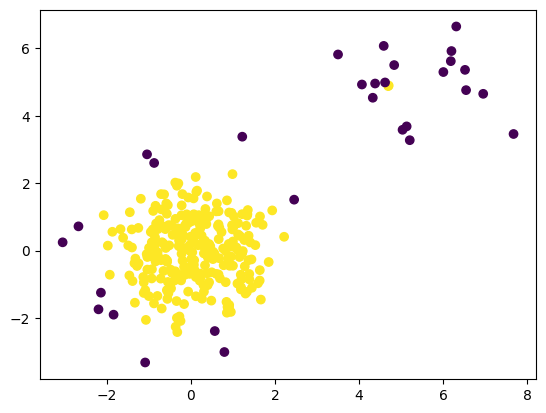

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

X = np.random.randn(300, 2)
X[:20] += 5

model = IsolationForest(contamination=0.1, random_state=42)
labels = model.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()


QUESTION 8:
Train SARIMA on AirPassengers and forecast 12 months.

ANSWER:


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


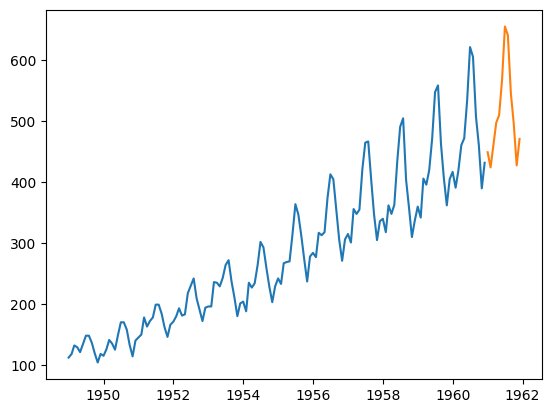

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

data = pd.read_csv("AirPassengers.csv", parse_dates=["Month"], index_col="Month")

model = SARIMAX(data["#Passengers"], order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()

forecast = results.forecast(12)

plt.plot(data.index, data["#Passengers"])
plt.plot(forecast.index, forecast)
plt.show()


QUESTION 9:
Apply Local Outlier Factor and visualize anomalies.

ANSWER:


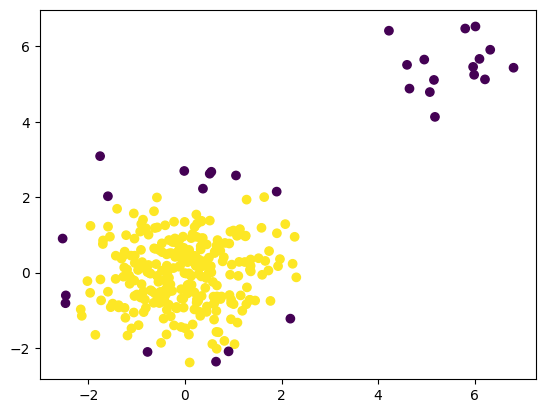

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

X = np.random.randn(300, 2)
X[:15] += 6

lof = LocalOutlierFactor(n_neighbors=20)
labels = lof.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()


QUESTION 10:
Explain real-time workflow for power grid monitoring.

ANSWER:
1. Clean streaming data and handle missing values.
2. Use Isolation Forest for real-time anomaly detection due to speed.
3. Use SARIMAX for short-term forecasting with weather as exogenous variable.
4. Validate using rolling forecast validation and monitor MAE, RMSE.
5. Detect spikes early, prevent overload, optimize resource allocation, reduce power failures.
